# K-means

The K-means algorithm is an unsupervised classification algorithm for data partitioning and a combinatorial optimization problem.

The principle of this algorithm consists in partitioning n observations into k clusters, in which each observation belongs to the cluster with the nearest mean. The most similar observations are grouped in the same subset and different observations are found in distinct subsets.

## Defining the K-means class

First, we'll import NumPy, a useful library for Python, designed to manipulate matrices or multidimensional arrays as well as mathematical functions operating on these arrays.

We'll import the random library to randomly initialize our training method.

In [1]:
import numpy as np
import random

Next, we'll define the K-means class.

In [2]:
class KMeans:
    # Constructor used to initialize the attributes of the K-means class
    def __init__(self, dimension, max_iter, n_clusters):
        self.dimension = dimension # Dimension of the observations
        self.max_iter = max_iter # Number of iterations before stopping the learning
        self.n_clusters = n_clusters # Number of clusters
        self.clusters = [] # The cluster ID of the observations
    # Method used to train the model i.e. to update the clusters and their means
    def fit(self, X):
        self.clusters = [-1] * len(X) # Initialize a vector with the right size
        means = [X[center] for center in random.sample(range(len(X)), self.n_clusters)] # Randomly select the centers of the clusters among the observations
        for _ in range(self.max_iter):
            for observation in range(len(X)):
                # Find the nearest cluster
                nearest_cluster = 0
                distance = np.sum((means[0] - X[observation])**2) # We use the euclidean distance but we can choose another one, depending on the problem
                for cluster in range(1, self.n_clusters):
                    if np.sum((means[cluster] - X[observation])**2) < distance:
                        nearest_cluster = cluster
                        distance = np.sum((means[cluster] - X[observation])**2)
                self.clusters[observation] = nearest_cluster
            # Update the means
            means = [np.zeros(self.dimension) for i in range(self.n_clusters)]
            cardinal = [0] * self.n_clusters
            for observation in range(len(X)):
                means[self.clusters[observation]] += X[observation]
                cardinal[self.clusters[observation]] += 1
            for cluster in range(self.n_clusters):
                means[cluster] = means[cluster] / cardinal[cluster]
    # Method used to get the partition i.e. the observations classes
    def get_data_clusters():
        return self.clusters

## Using the K-means on some data

### Visualizing the data

First, we'll import Pandas and Matplotlib, designed to manipulate, analyze and visualize data.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Then, we'll import the data.
It's one of the best known datasets in Machine Learning litterature. Here are some caracteristics of this dataset:
- 150 samples with 4 numerical attributes
- 3 balanced classes (50 samples for each class)
- no missing, duplicate or invalid data

In [4]:
data = pd.read_csv("iris.csv")
data

,sepal.length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


For this example, we'll only select the first 100 lines (corresponding to the first 2 classes, for a better classification result) and the columns 0 and 2 (corresponding to the lengths of the sepals and the petals).
We could have used more than 2 attributes but we chose to use only 2 for a better visualisation of the method.

In [5]:
X_data = data.iloc[0:100, [0, 2]].values # Select the observations

Now, we'll visualize the data on a graph.

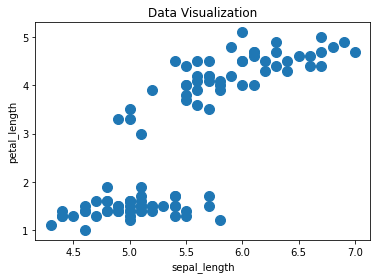

In [6]:
plt.scatter(X_data[:, 0], X_data[:, 1], s = 100)
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Data Visualization')
plt.show()

### Train the model

It's time to partition the observations. First, we'll try with 2 clusters.

In [7]:
k_means = KMeans(dimension = 2, max_iter = 100, n_clusters = 2) # Initialize our model
k_means.fit(X_data) # Partition the observations

Now, we'll visualize the clusters.

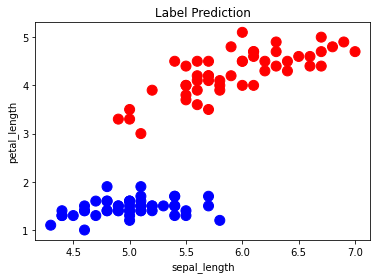

In [8]:
colors = {0: 'red', 1: 'blue'}
y_colors = [colors[y] for y in k_means.clusters]
plt.scatter(X_data[:, 0], X_data[:, 1], c = y_colors, s = 100)
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Label Prediction')
plt.show()

Now, we'll try with 3 clusters.

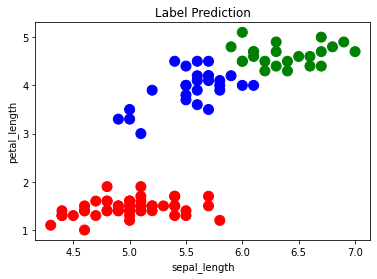

In [9]:
k_means = KMeans(dimension = 2, max_iter = 100, n_clusters = 3) # Initialize our model
k_means.fit(X_data) # Partition the observations

colors = {0: 'red', 1: 'blue', 2:'green'}
y_colors = [colors[y] for y in k_means.clusters]
plt.scatter(X_data[:, 0], X_data[:, 1], c = y_colors, s = 100)
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Label Prediction')
plt.show()